# Climate Change Belief Analysis

##### Classification_TeamMM1_DSFT21

# Introduction

We live on a planet with finite natural resources, these resources are the basis on which the modern economy is built upon. An outcome of using natural resources to fuel the modern economy, given by scientific evidence is climate change. The scientific evidence is overwhelming but there are still those who deny the existence of climate change.

The split in opinion on the existence of climate change affects businesses. Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. 

EDSA is challenging the team during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

# Table of Contents

1.Importing Libraries

2.Importing Dataset

3.Data Preprocessing

4.Exploratory Data Analysis

5.Feature Engineering and Selection

6.Model Selection

7.Model Evaluation


# Importing Libraries

In [1]:
from comet_ml import Experiment

In [3]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="0F7HQ5cQHkSlhwVvlf3D7P20c",
    project_name="classification-teammm1",
    workspace="katlegolionel",
)

experiment.display()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/katlegolionel/classification-teammm1/34fce535cafb4ce195be0c974680ba01



In [4]:
# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180
# NLP Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,TreebankWordTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [5]:
# Loading in the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv('sample_submission.csv')

# Data Preprocessing

## Summary Statistics

In [6]:
# Looking at the first few entries in the dataset
train.head()


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [7]:
# Shape of the dataset
train.shape

(15819, 3)

In [8]:
# dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [9]:
# Looking at the numbers of possible classes in our sentiment
train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

In [10]:
# Looking at the how the messages are distributed across the sentiment
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


## Missing values

In [11]:
# Checking for missing values
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

As we can see our dataset has no missing values.

In [12]:
# Checking whether a character is white-space character or not
print(len(train['message']))
print(sum(train['message'].apply(lambda x: x.isspace())))

15819
0


In [13]:
# Sample tweet
tweet = train.iloc[6,1]
print(tweet)

RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R


Text(0.5, 1.0, 'Distribution of target labels')

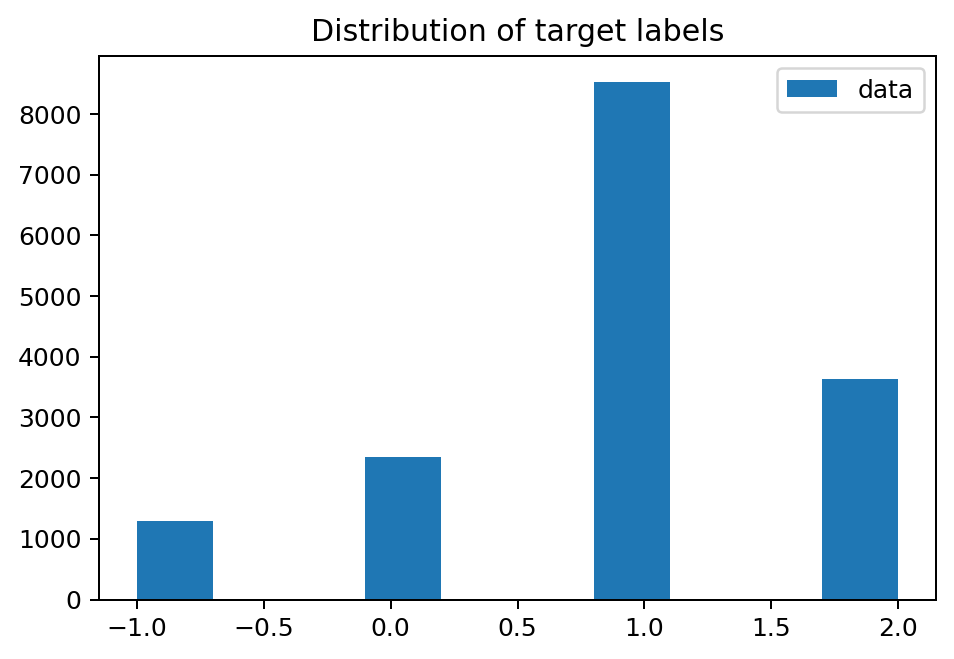

In [14]:
# Visualizing the distribution of the target 
plt.hist(train['sentiment'], label='data');
plt.legend();
plt.title('Distribution of target labels')

Text(0, 0.5, 'Density')

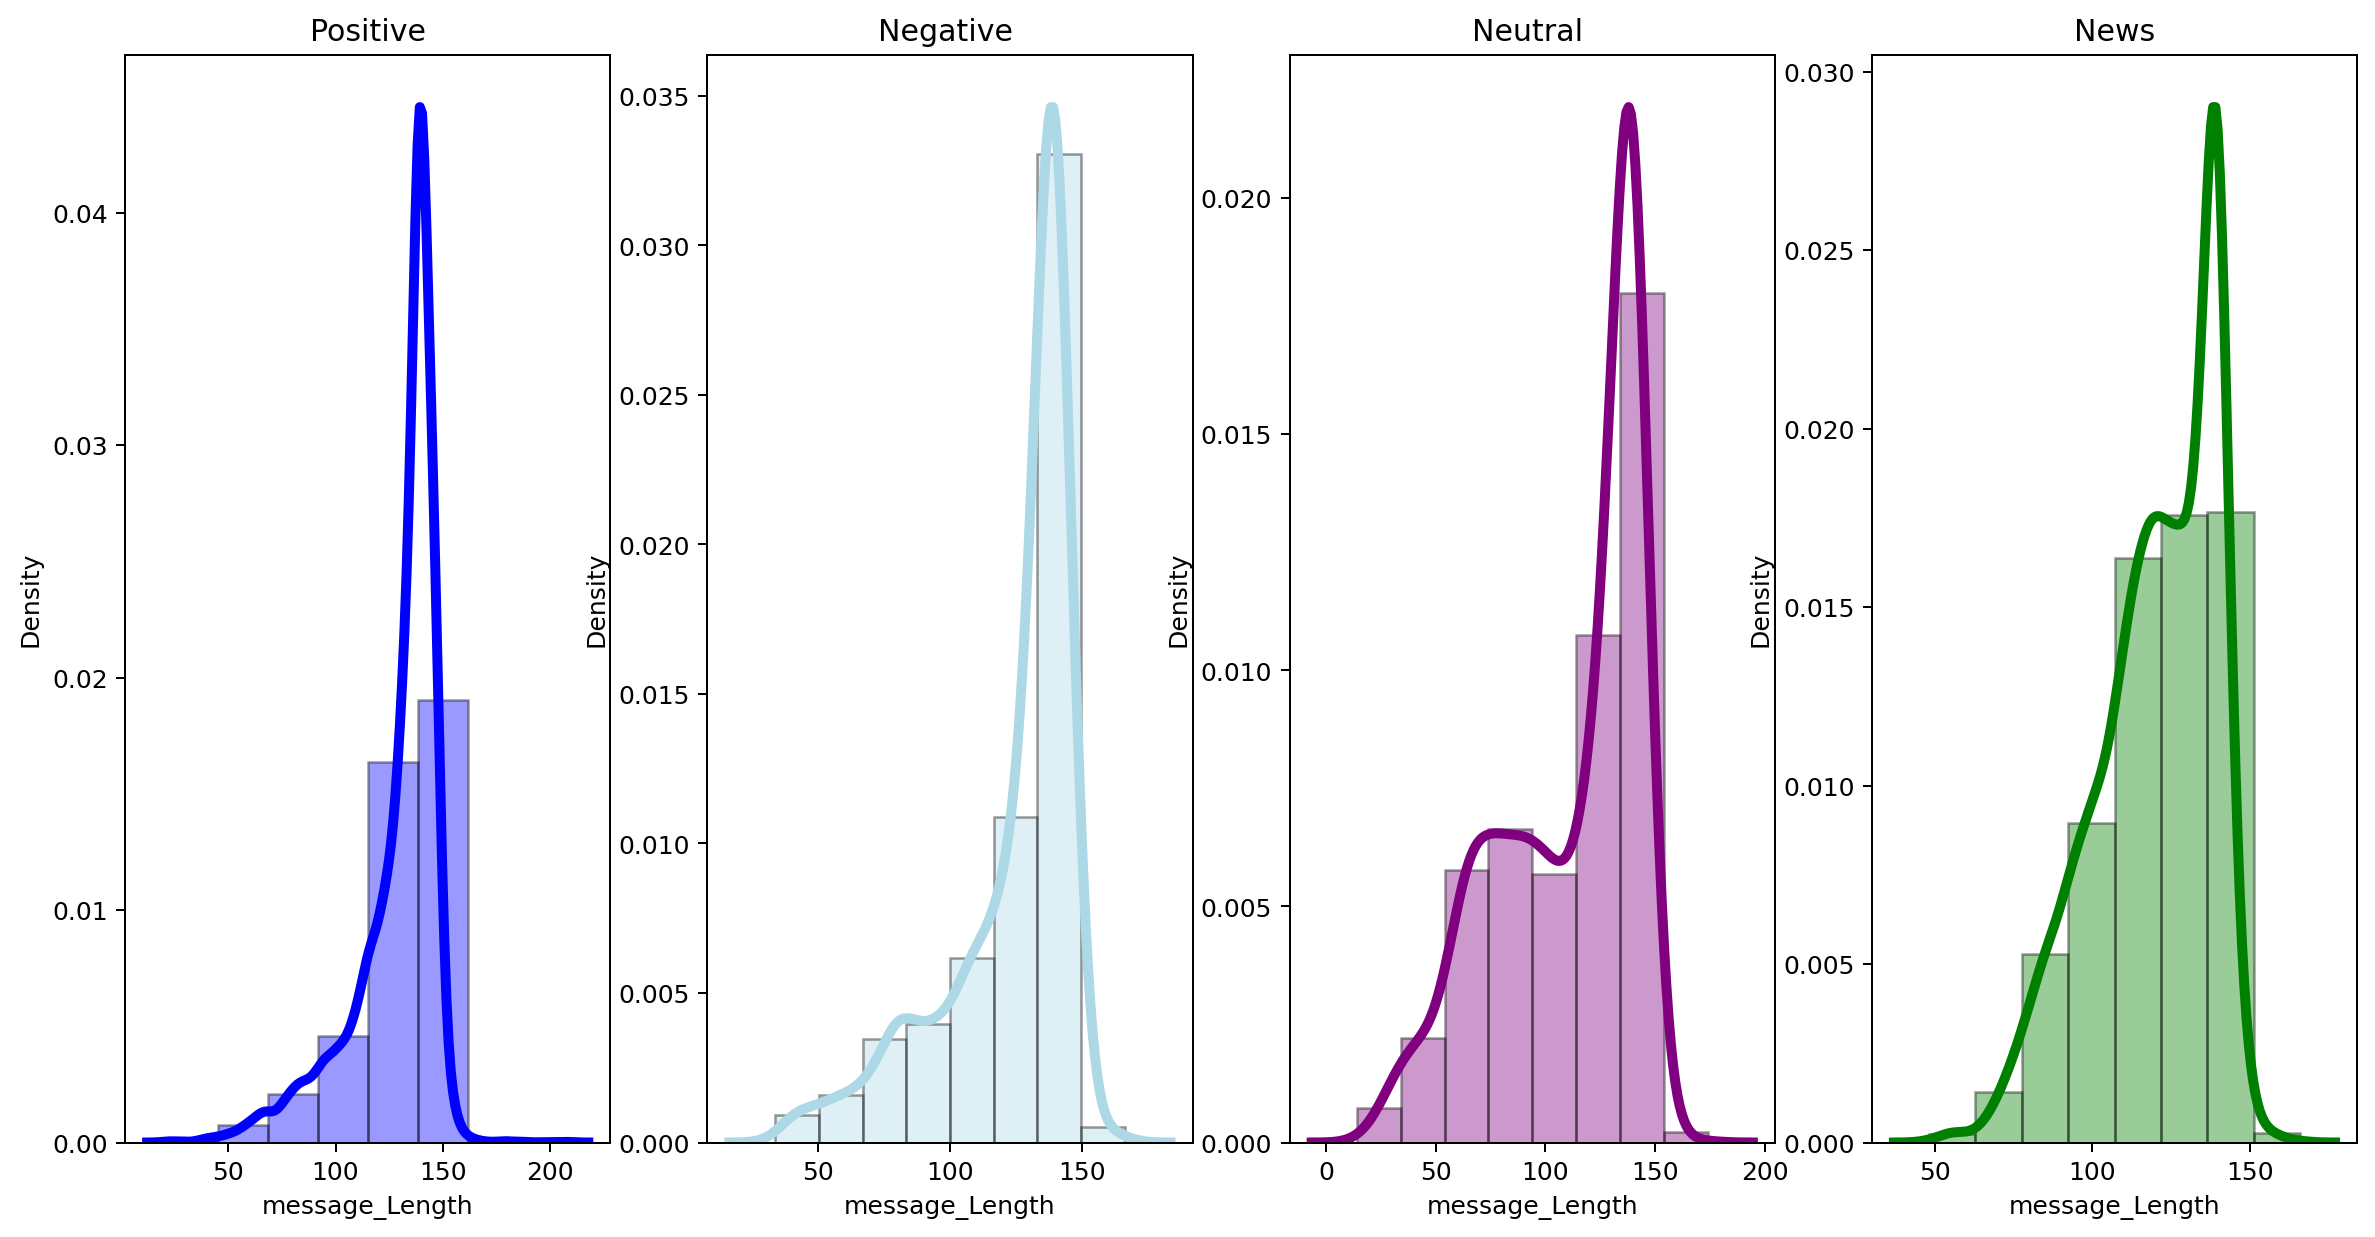

In [15]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#For Positive 
sns.distplot(train[train['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(train[train['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'lightblue', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(train[train['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For Neews
sns.distplot(train[train['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'green', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

# Exploratory Data Analysis

We need to perform investigative and detective analysis on our data to see if we can gain any useful insights. We have data being generated from tweets, it’s important to utilize Exploratory Data Analysis to analyze all this text data, with the aid of Visuals to help organizations make data-driven decisions.

In [16]:
new_df = train.copy()

#Labeling the target
new_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in new_df['sentiment']]

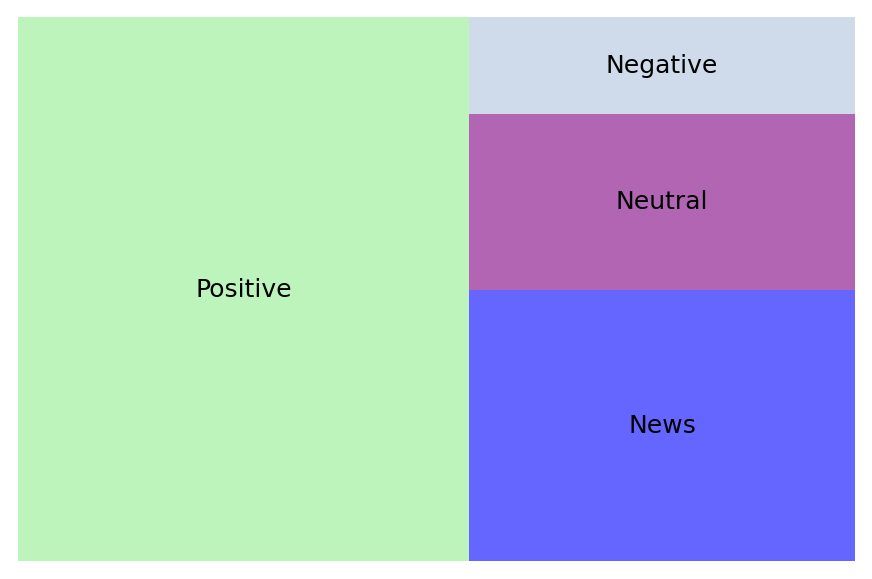

In [17]:
import squarify

# checking the numerical distribution
values = new_df['sentiment'].value_counts()/new_df.shape[0]
labels = (new_df['sentiment'].value_counts()/new_df.shape[0]).index 
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']

squarify.plot(sizes=values, label=labels,  color=colors, alpha=0.6)
plt.axis('off')
plt.show()

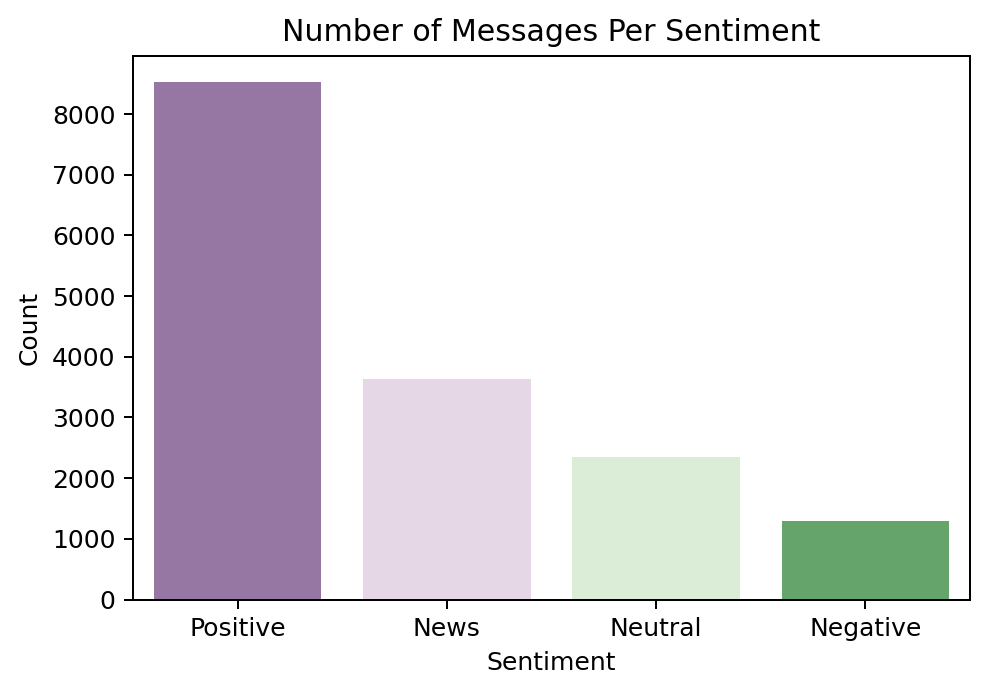

In [18]:
sns.countplot(x='sentiment' ,data = new_df, palette='PRGn')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Messages Per Sentiment')
plt.show()

As we noted earlier that there is an imbalance of classes in the daset, this can lead to a disproportionate ratio of observations in each class, causing problems as most algorithms are designed to maximize accuracy and reduce error. We therefore continue to analyse and evaluate for more insights to be derived from the dataset as we prepared to balance later on in the analysis.

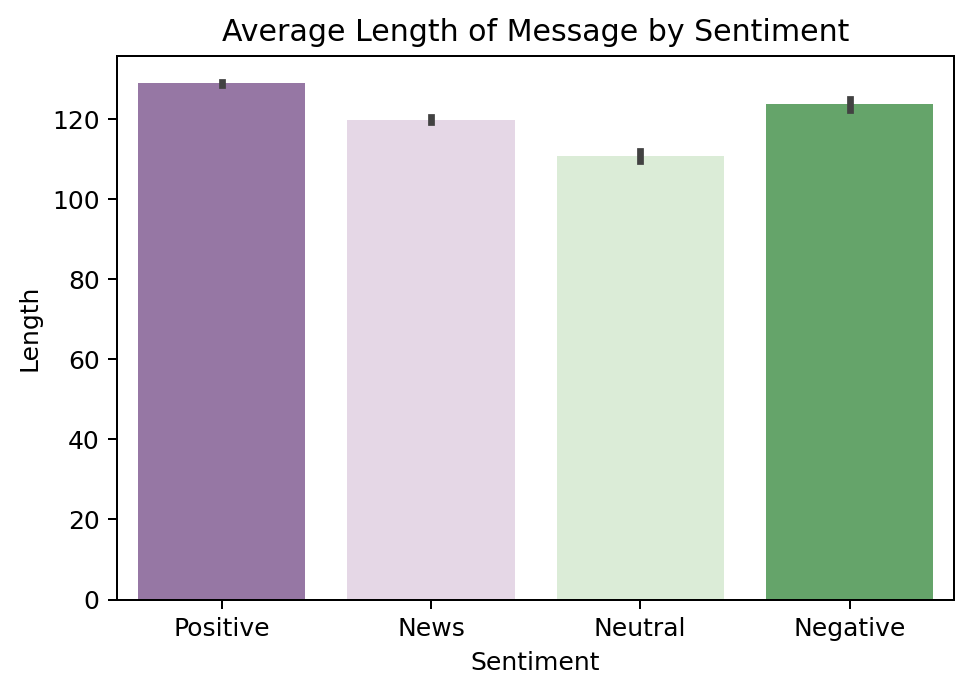

In [19]:
# Visualizing text lengths for each sentiment
sns.barplot(x='sentiment', y=new_df['message'].apply(len) ,data = new_df, palette='PRGn')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

In [20]:
# Extracting Users in a column
new_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in new_df.message]

# Creating a column of hastags
new_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in new_df.message]

In [21]:
# Generating Counts of users
counts = new_df[['message', 'users']].groupby('users', as_index=False).count().sort_values(by='message', ascending=False)

In [22]:
# Top 5 most popular
counts.head()

,users,message
3410,@StephenSchlegel,307
3270,@SenSanders,243
6182,@realDonaldTrump,143
448,@BernieSanders,121
612,@CNN,106


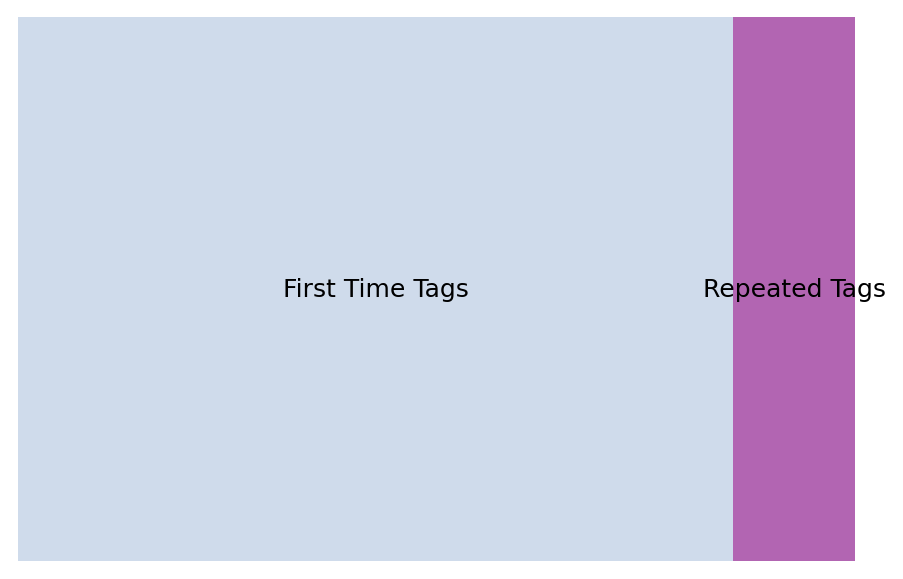

In [23]:
# checking the numerical distribution
values = [sum(np.array(counts['message']) == 1)/len(counts['message']), sum(np.array(counts['message']) != 1)/len(counts['message'])]
labels = ['First Time Tags', 'Repeated Tags']
colors = ['lightsteelblue', "purple"]

squarify.plot(sizes=values, label=labels,  color=colors, alpha=0.6)
plt.axis('off')
plt.show()

In [24]:
repeated_tags_rate = round(sum(np.array(counts['message']) > 1)*100/len(counts['message']), 1)
print(f"{repeated_tags_rate} percent of the data are from repeated tags")

14.6 percent of the data are from repeated tags


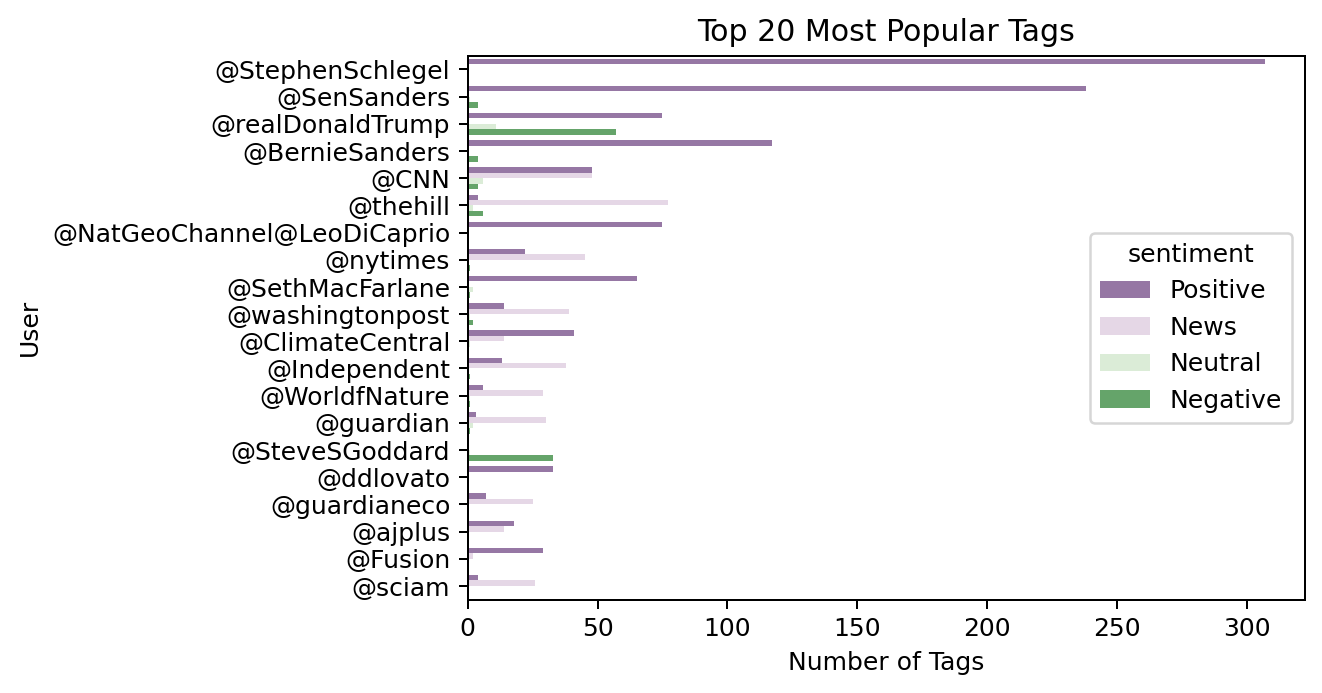

In [25]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", hue="sentiment", data=new_df, palette='PRGn',
              order=new_df.users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Most Popular Tags')
plt.show()
#plt.xticks(rotation=90)

Now that we've had a look at the tweets themselves as well as the users, we now analyse the hastags:

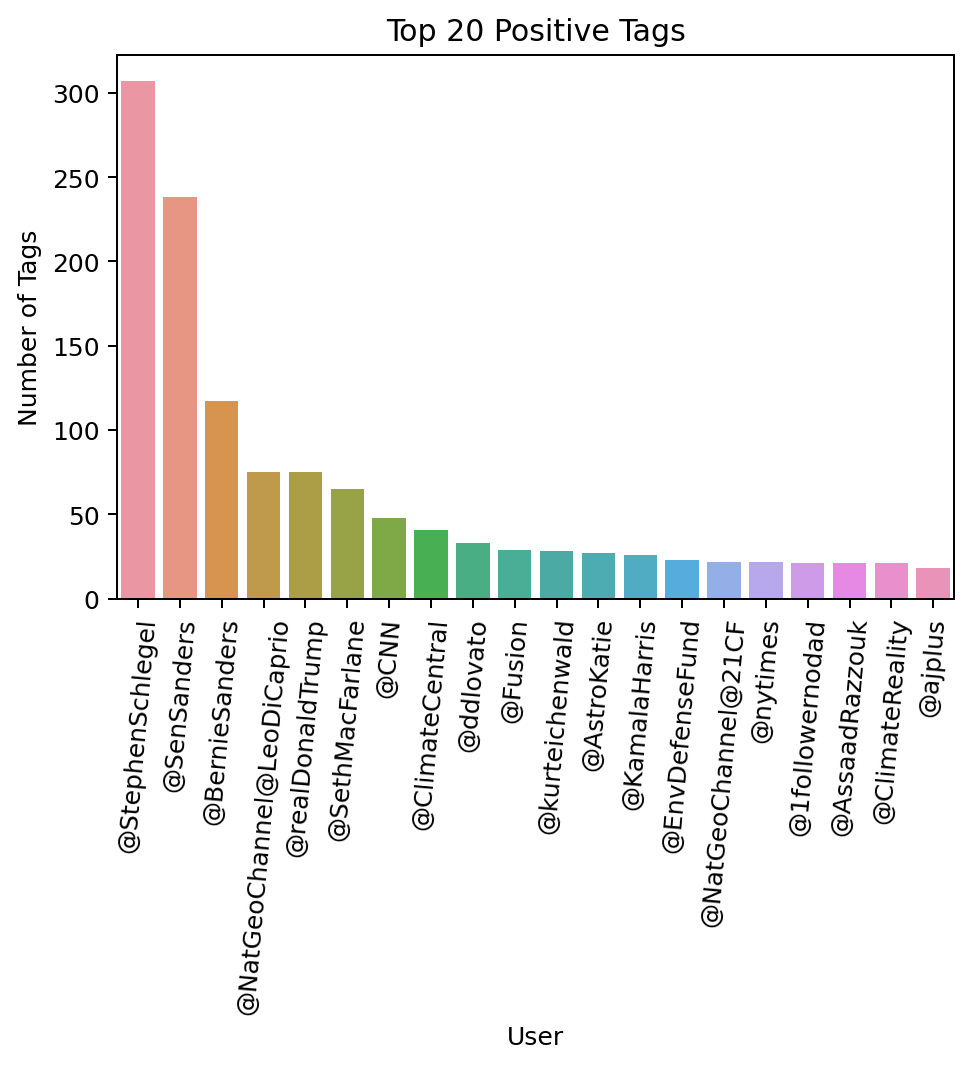

In [26]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=new_df[new_df['sentiment'] == 'Positive'],
              order=new_df[new_df['sentiment'] == 'Positive'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Positive Tags')
plt.xticks(rotation=85)
plt.show()


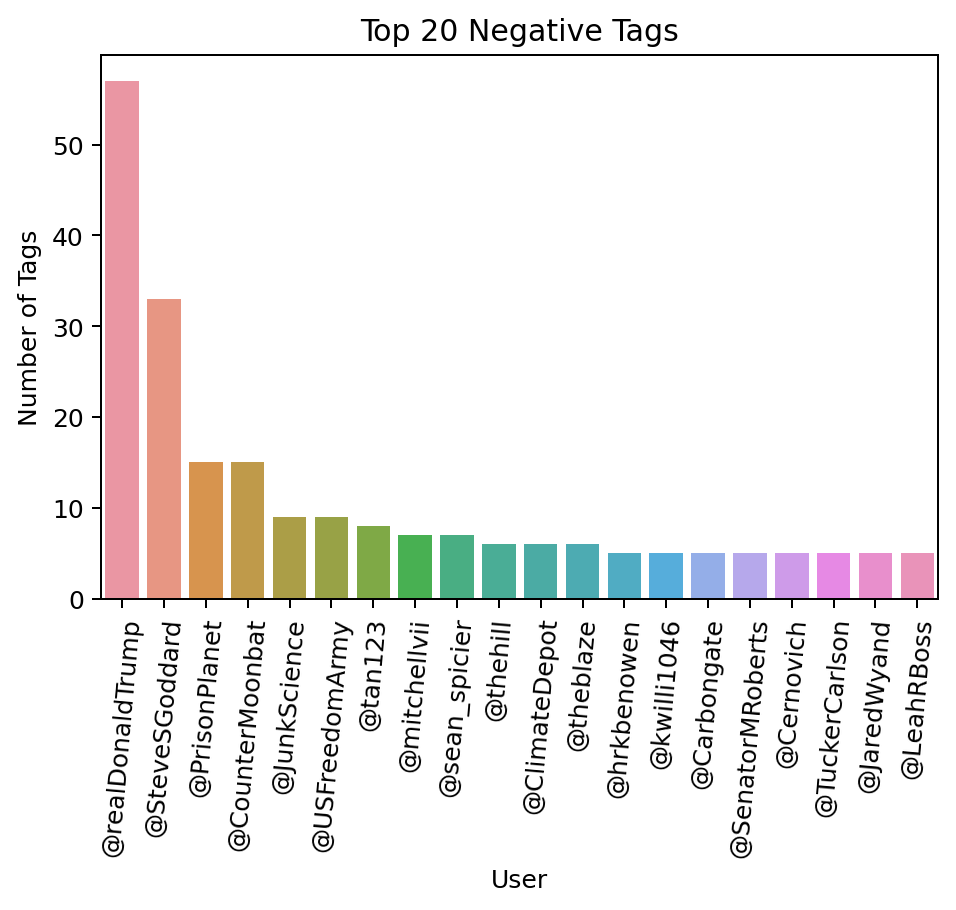

In [27]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=new_df[new_df['sentiment'] == 'Negative'],
              order=new_df[new_df['sentiment'] == 'Negative'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Negative Tags')
plt.xticks(rotation=85)
plt.show()


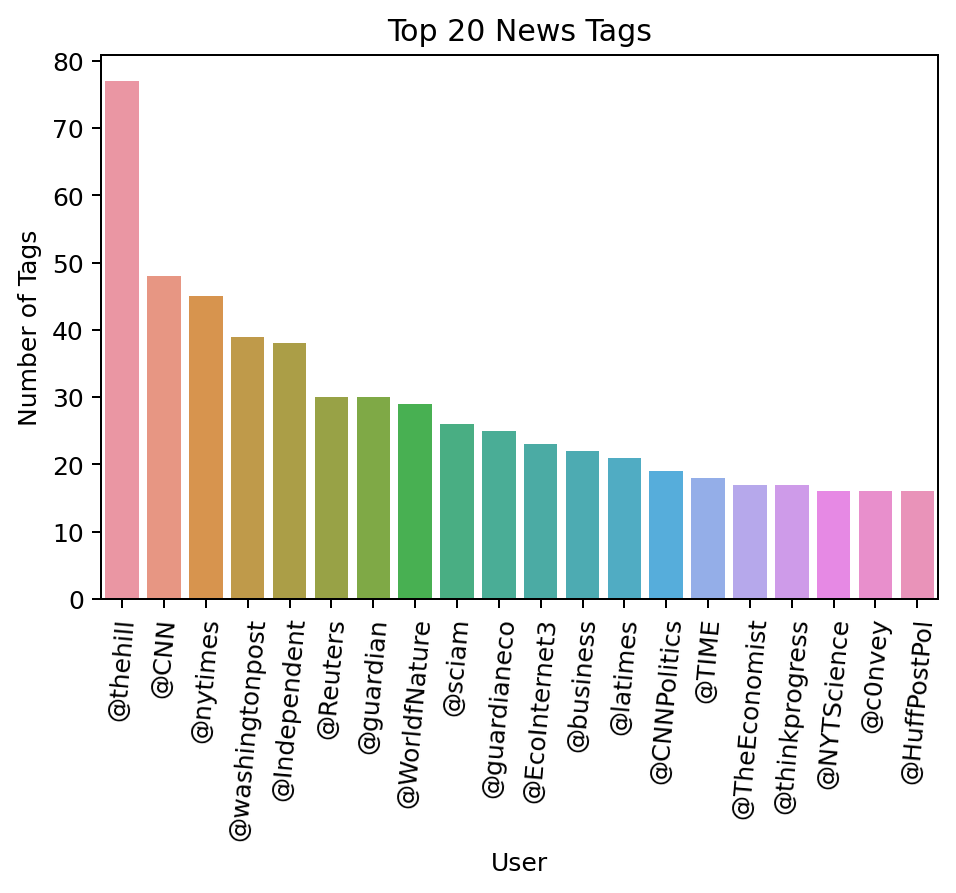

In [28]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=new_df[new_df['sentiment'] == 'News'],
              order=new_df[new_df['sentiment'] == 'News'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 News Tags')
plt.xticks(rotation=85)
plt.show()


## Data cleaning and feature transformation

**Data cleaning**
The approach used to clean the data is to divide it into 2 sets:
- Data set 1 where the rows with sentiment of 2 (factual news) are removed since they do not tell us whether the tweet is positive, negative or neutal.
- Data set 2 where the rows with sentiment of 2 are kept.

The second dataset is cleaned as follows:
- The target column classes (sentiment) are upscaled and downscaled to match the length of half the largest class
- URL's are replaced with the string url-web
- Convert tweets to lower case
- Removed punctuation marks
- Tokenized the tweets
- Lemmatized tweets

The model/s will then be trained on both sets to see which set performs better.

**Feature transformation**

The CountVectorizer will be used to select and transform the features to numerical form where the parameters are tweaked as follows:
- stopwords = 'english'                   
    removes english stopwords
    
- ngram_range = (1,2)                     
    splits tweets into unigrams and bigrams
    
- token_pattern = r'\b[^\d\W][^\d\W]+\b'  
    removes all punctuation present in the tweet
    
- max_features = 300                      
    for space purposes
    
- min_df = 5                            
    ignores terms with a frequency lower than 5



Data set 2:

In [29]:
# make a copy of the train set
train_copy = train.copy()

The code below scales the classes of the target variable(sentiment)

In [30]:
#feature scaling
from sklearn.utils import resample
# Separate the classes
positive = train_copy[train_copy['sentiment'] == 1]
negative = train_copy[train_copy['sentiment'] == -1]
neutral = train_copy[train_copy['sentiment'] == 0]
news = train_copy[train_copy['sentiment'] == 2]

In [31]:
#get the majority class size
majority_size = len(train_copy[train_copy['sentiment']==1]) 

# choose a class size thats roughly half the majority class
class_size = majority_size/2 

In [32]:
# Upsample the negative class classes
negative_upsampled = resample(negative,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=int(class_size), # match number of majority class/2
                          random_state=30) # reproducible results

In [33]:
# Upsample the neutral class 
neutral_upsampled = resample(neutral,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=int(class_size), # match number in majority class
                          random_state=30) # reproducible results

In [34]:
# Upsample the news class 
news_upsampled = resample(news,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=int(class_size), # match number in majority class
                          random_state=30) # reproducible results

In [35]:
# downsample the positive class 
positive_downsampled = resample(positive,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=int(class_size), # match number in majority class
                          random_state=30) # reproducible results

Check the length of the classes to see if they are equal.

In [36]:
print(len(negative_upsampled),len(neutral_upsampled ),len(news_upsampled),len(positive_downsampled))

4265 4265 4265 4265


In [37]:
# Combine upsampled minority class with majority class
resampled = pd.concat([negative_upsampled,neutral_upsampled,news_upsampled, positive_downsampled])
resampled['sentiment'].value_counts()

 0    4265
 1    4265
 2    4265
-1    4265
Name: sentiment, dtype: int64

View the resampled dataframe

In [38]:
resampled.head()

,sentiment,message,tweetid
5087,-1,Spys saved the day in that charade. It's actua...,308396
11377,-1,RT @realDonaldTrump: The concept of global war...,758209
6168,-1,RT @BrosukeH: It's also why the liberals want ...,142997
14219,-1,@Newsweek Climate stenographers. Not enough ic...,764103
11168,-1,RT @DavidJo52951945: Scientist says climate ch...,329691


Replace urls with url-web

In [39]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
resampled['message'] = resampled['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

Convert tweets to lower case

In [40]:
# convert message to lower string
resampled['message'] = resampled['message'].str.lower()


resampled.head()

,sentiment,message,tweetid
5087,-1,spys saved the day in that charade. it's actua...,308396
11377,-1,rt @realdonaldtrump: the concept of global war...,758209
6168,-1,rt @brosukeh: it's also why the liberals want ...,142997
14219,-1,@newsweek climate stenographers. not enough ic...,764103
11168,-1,rt @davidjo52951945: scientist says climate ch...,329691


Remove punctuation marks

In [41]:
def remove_punctuation(tweet):
    return ''.join([l for l in tweet if l not in string.punctuation])

In [42]:
resampled['message'] = resampled['message'].apply(remove_punctuation)

View resampled data

In [43]:
resampled.head()

,sentiment,message,tweetid
5087,-1,spys saved the day in that charade its actuall...,308396
11377,-1,rt realdonaldtrump the concept of global warmi...,758209
6168,-1,rt brosukeh its also why the liberals want to ...,142997
14219,-1,newsweek climate stenographers not enough ice ...,764103
11168,-1,rt davidjo52951945 scientist says climate chan...,329691


Tokenize text

In [44]:
# tokenize
tokeniser = TreebankWordTokenizer()
resampled['tokens'] = resampled['message'].apply(tokeniser.tokenize)

In [45]:
resampled.head()

,sentiment,message,tweetid,tokens
5087,-1,spys saved the day in that charade its actuall...,308396,"[spys, saved, the, day, in, that, charade, its..."
11377,-1,rt realdonaldtrump the concept of global warmi...,758209,"[rt, realdonaldtrump, the, concept, of, global..."
6168,-1,rt brosukeh its also why the liberals want to ...,142997,"[rt, brosukeh, its, also, why, the, liberals, ..."
14219,-1,newsweek climate stenographers not enough ice ...,764103,"[newsweek, climate, stenographers, not, enough..."
11168,-1,rt davidjo52951945 scientist says climate chan...,329691,"[rt, davidjo52951945, scientist, says, climate..."


Lemmatize text

In [46]:
# lemmatization

lemmatizer = WordNetLemmatizer()

In [47]:
def climate_change_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [48]:
resampled['lemma'] = resampled['tokens'].apply(climate_change_lemma, args=(lemmatizer, ))

In [49]:
resampled.head()

,sentiment,message,tweetid,tokens,lemma
5087,-1,spys saved the day in that charade its actuall...,308396,"[spys, saved, the, day, in, that, charade, its...","[spy, saved, the, day, in, that, charade, it, ..."
11377,-1,rt realdonaldtrump the concept of global warmi...,758209,"[rt, realdonaldtrump, the, concept, of, global...","[rt, realdonaldtrump, the, concept, of, global..."
6168,-1,rt brosukeh its also why the liberals want to ...,142997,"[rt, brosukeh, its, also, why, the, liberals, ...","[rt, brosukeh, it, also, why, the, liberal, wa..."
14219,-1,newsweek climate stenographers not enough ice ...,764103,"[newsweek, climate, stenographers, not, enough...","[newsweek, climate, stenographer, not, enough,..."
11168,-1,rt davidjo52951945 scientist says climate chan...,329691,"[rt, davidjo52951945, scientist, says, climate...","[rt, davidjo52951945, scientist, say, climate,..."


View a lemmatized row

In [50]:
for i, t in enumerate(resampled.iloc[1]['tokens']):
    print ('{:20s} --> {:10s}'.format(t, resampled.iloc[1]['lemma'][i]))

rt                   --> rt        
realdonaldtrump      --> realdonaldtrump
the                  --> the       
concept              --> concept   
of                   --> of        
global               --> global    
warming              --> warming   
was                  --> wa        
created              --> created   
by                   --> by        
and                  --> and       
for                  --> for       
the                  --> the       
chinese              --> chinese   
in                   --> in        
order                --> order     
to                   --> to        
make                 --> make      
us                   --> u         
manufacturing        --> manufacturing
noncompetitive       --> noncompetitive


Convert lemma column to string so that it wont give errors when passed to CountVectorizer

In [51]:
def words_to_string(l):
    #takes a list of words and converts them to a string
    sentence = " ".join(l)
    return sentence

In [52]:
resampled['lema_to_string'] = resampled['lemma'].apply(words_to_string)


In [53]:
resampled.head()

,sentiment,message,tweetid,tokens,lemma,lema_to_string
5087,-1,spys saved the day in that charade its actuall...,308396,"[spys, saved, the, day, in, that, charade, its...","[spy, saved, the, day, in, that, charade, it, ...",spy saved the day in that charade it actually ...
11377,-1,rt realdonaldtrump the concept of global warmi...,758209,"[rt, realdonaldtrump, the, concept, of, global...","[rt, realdonaldtrump, the, concept, of, global...",rt realdonaldtrump the concept of global warmi...
6168,-1,rt brosukeh its also why the liberals want to ...,142997,"[rt, brosukeh, its, also, why, the, liberals, ...","[rt, brosukeh, it, also, why, the, liberal, wa...",rt brosukeh it also why the liberal want to st...
14219,-1,newsweek climate stenographers not enough ice ...,764103,"[newsweek, climate, stenographers, not, enough...","[newsweek, climate, stenographer, not, enough,...",newsweek climate stenographer not enough ice c...
11168,-1,rt davidjo52951945 scientist says climate chan...,329691,"[rt, davidjo52951945, scientist, says, climate...","[rt, davidjo52951945, scientist, say, climate,...",rt davidjo52951945 scientist say climate chang...


Pass the data to count vectorizer to convert it to numerical form

In [54]:
# vectorization using CountVectorizer
vect = CountVectorizer(stop_words='english',
                      ngram_range=(1,2),
                      token_pattern=r'\b[^\d\W][^\d\W]+\b',
                      max_features =300,
                      min_df = 5 
                    
                      )

In [55]:
vect.fit(resampled['lema_to_string'])

CountVectorizer(max_features=300, min_df=5, ngram_range=(1, 2),
                stop_words='english',
                token_pattern='\\b[^\\d\\W][^\\d\\W]+\\b')

In [56]:
x = vect.transform(resampled['lema_to_string'])

View the vectorized data

In [57]:
x.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

convert the array to  a dataframe

In [58]:
# convert the array to  a dataframe
x_df = pd.DataFrame(x.toarray(),columns=vect.get_feature_names())

In [59]:
x_df.head()

,action,action climate,actually,administration,agenda,agreement,al,al gore,america,american,...,winter,woman,wont,work,world,world leader,worse,year,yes,youre
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y = resampled['sentiment']

In [61]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/katlegolionel/classification-teammm1/34fce535cafb4ce195be0c974680ba01
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (6 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 108